In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import plot_yse_ztf_file
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
def plotSed(dir, plt_title,Xoffset):
    snSED = pd.read_csv(dir,delimiter=' ',skiprows = 2)
    snSEDx = snSED.iloc[:, 0].to_numpy().astype(np.float)
    snSEDy = snSED.iloc[:, 1].to_numpy().astype(np.float)
    snSEDz = snSED.iloc[:, 2].to_numpy().astype(np.float)
    
    mask = np.argwhere(~np.isnan(snSEDy))
    snSEDx = snSEDx[mask]
    snSEDy = snSEDy[mask]
    snSEDz = snSEDz[mask]
    snSEDz[np.isnan(snSEDz)] = 1.00E-9
    
    snSEDzz = np.zeros((len(np.unique(snSEDx)),len(np.unique(snSEDy))))
    for i in range(len(snSEDz)):
        snSEDzz[int(i / 1880)][i % 1880] = snSEDz[i]
    plt.contourf(np.unique(snSEDx + Xoffset),np.unique(snSEDy),snSEDzz.T)
    plt.xlabel("Days Since Peak",fontsize = 16)
    plt.ylabel("Wavelength (Å)",fontsize = 16)
    cbar = plt.colorbar()
    cbar.set_label("Flux (erg s⁻¹ cm⁻² Å⁻¹)",fontsize = 16)
    plt.title(plt_title,fontsize = 16)
    plt.savefig(dir + '.png', bbox_inches='tight')
    plt.show()
    

In [3]:
def plotSed3Spec(dir):
    snSED = pd.read_csv(dir,delimiter=' ',skiprows = 2)
    snSEDx = snSED.iloc[:, 0].to_numpy().astype(np.float)
    snSEDy = snSED.iloc[:, 1].to_numpy().astype(np.float)
    snSEDz = snSED.iloc[:, 2].to_numpy().astype(np.float)
    
    mask = np.argwhere(~np.isnan(snSEDy))
    snSEDx = snSEDx[mask]
    snSEDy = snSEDy[mask]
    snSEDz = snSEDz[mask]
    snSEDz[np.isnan(snSEDz)] = 1.00E-9
    
    snSEDzz = np.zeros((len(np.unique(snSEDx)),len(np.unique(snSEDy))))
    for i in range(len(snSEDz)):
        snSEDzz[int(i / 1880)][i % 1880] = snSEDz[i]
        
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4), sharex=True, sharey=True)
    ax1.plot(np.unique(snSEDy),snSEDzz[11],label = "SED",color = "red",alpha = 0.7)
    ax2.plot(np.unique(snSEDy),snSEDzz[12],label = "SED",color = "red",alpha = 0.7)
    ax3.plot(np.unique(snSEDy),snSEDzz[13],label = "SED",color = "red",alpha = 0.7)
    plt.show()

In [4]:
def plotSpec(dir,axis = None ,roll = False):
    spec_curve = pd.read_csv(dir, delim_whitespace=True)
    #spec_curve.rename(columns = [1])
    if (roll):
        spec_curve["flux"] = spec_curve["flux"].rolling(5).mean()
    wavelen = spec_curve.iloc[:,0]
    fluxs = spec_curve.iloc[:,1]
    wavelen.to_numpy()
    fluxs.to_numpy()
    if (axis == None):
        plt.plot(wavelen,fluxs)
    else:
        axis.plot(wavelen,fluxs)

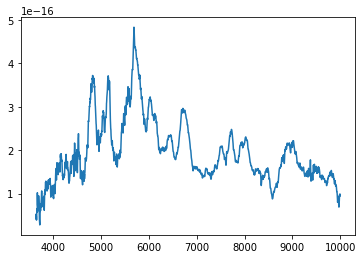

In [5]:
plotSpec("spec//SN2020esm//58992.txt")

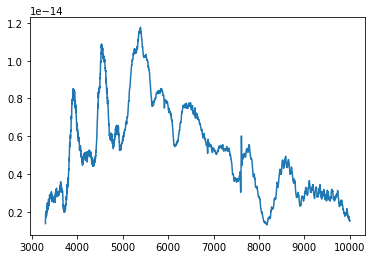

In [6]:
plotSpec("spec//2020oi//58868.638.txt")

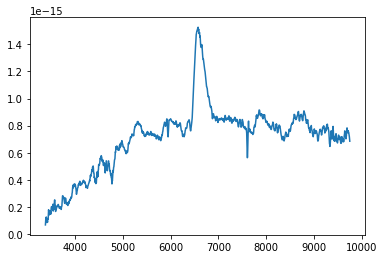

In [7]:
plotSpec("spec//2020fqv//58957.3.txt")

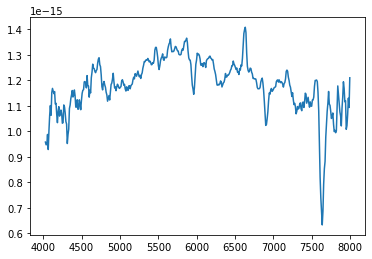

In [8]:
plotSpec("spec//2020fqv//58940.txt")

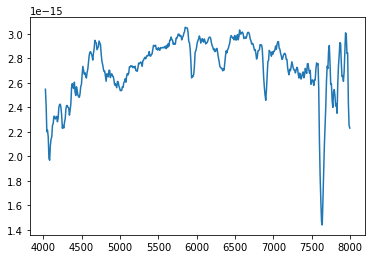

In [9]:
plotSpec("spec//2020fqv//58940.9.txt")

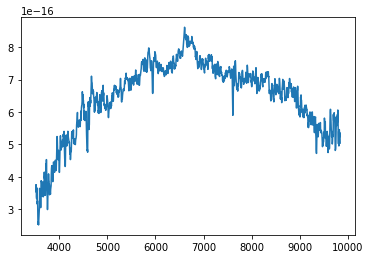

In [10]:
plotSpec("spec//2020fqv//58941.25.txt")

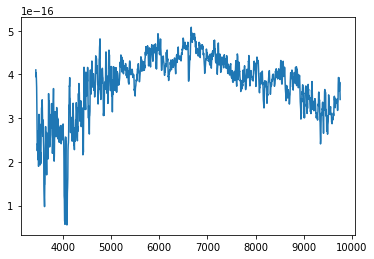

In [11]:
plotSpec("spec//2020fqv//58943.25.txt")

Text(0.5, 1.0, '58942.25')

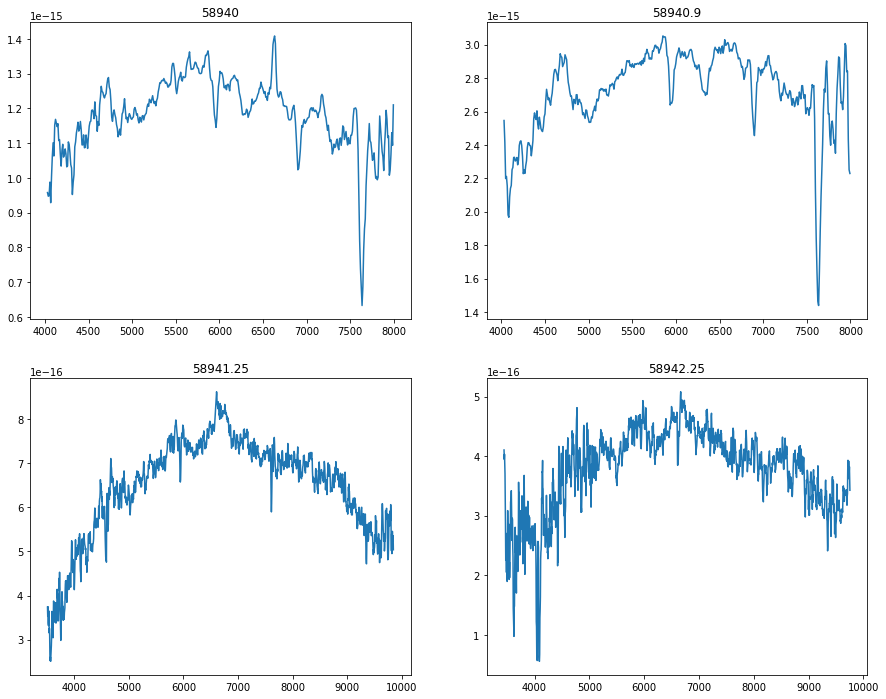

In [12]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,12))
plotSpec("spec//2020fqv//58940.txt",ax1)
plotSpec("spec//2020fqv//58940.9.txt",ax2)
plotSpec("spec//2020fqv//58941.25.txt",ax3)
plotSpec("spec//2020fqv//58943.25.txt",ax4)
ax1.set_title("58940")
ax2.set_title("58940.9")
ax3.set_title("58941.25")
ax4.set_title("58942.25")


In [13]:
iptf = pd.read_csv("pycoco_iPTF13bvn.SED",delimiter=' ',skiprows = 2)
bgu = pd.read_csv("pycoco_SN2017bgu.SED",delimiter=' ',skiprows = 2)
oi = pd.read_csv("pycoco_SN2020oi.SED",delimiter=' ',skiprows = 2)
oic = pd.read_csv("pycoco_SN2020oi_copy.SED",delimiter=' ',skiprows = 2)
yuf = pd.read_csv("pycoco_SN2019yuf.SED",delimiter=' ',skiprows = 2)
sgf = pd.read_csv("pycoco_SN2020sgf.SED",delimiter=' ',skiprows = 2)
yvr = pd.read_csv("pycoco_SN2019yvr.SED",delimiter=' ',skiprows = 2)
fqv = pd.read_csv("pycoco_SN2020fqv.SED",delimiter=' ',skiprows = 2)

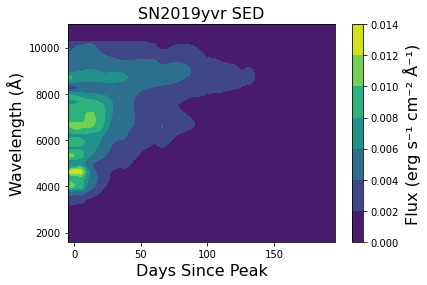

In [14]:
plotSed("pycoco_SN2019yvr.SED", "SN2019yvr SED",-5)

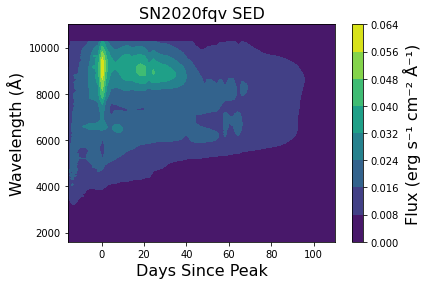

In [15]:
plotSed("pycoco_SN2020fqv.SED", "SN2020fqv SED",-11)

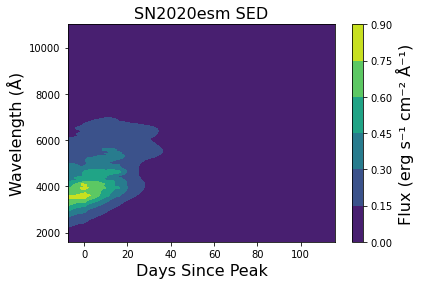

In [16]:
plotSed("pycoco_SN2020esm.SED", "SN2020esm SED", 6)

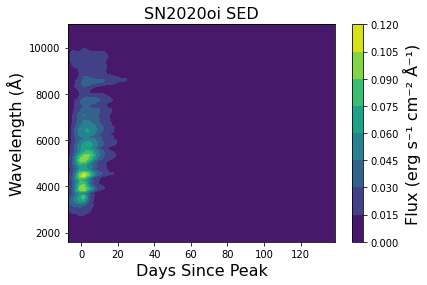

In [17]:
plotSed("pycoco_SN2020oi.SED", "SN2020oi SED",4)

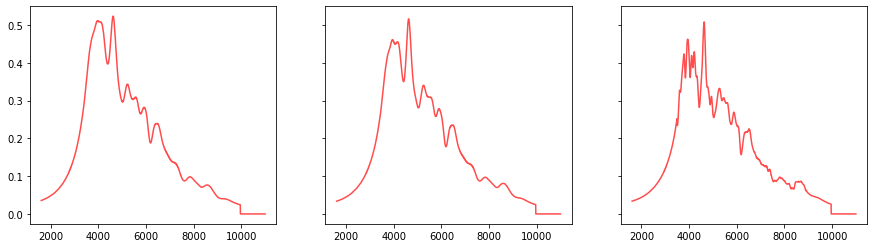

In [18]:
plotSed3Spec("pycoco_SN2020esm.SED")

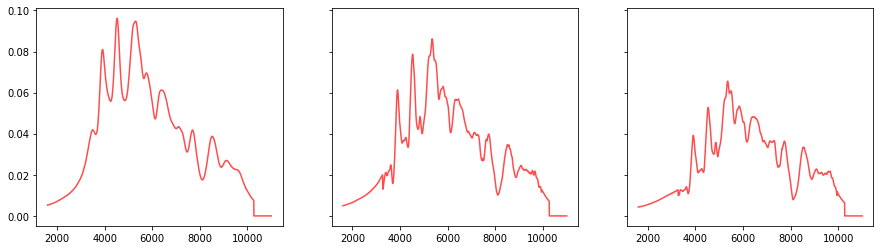

In [19]:
plotSed3Spec("pycoco_SN2020oi.SED")

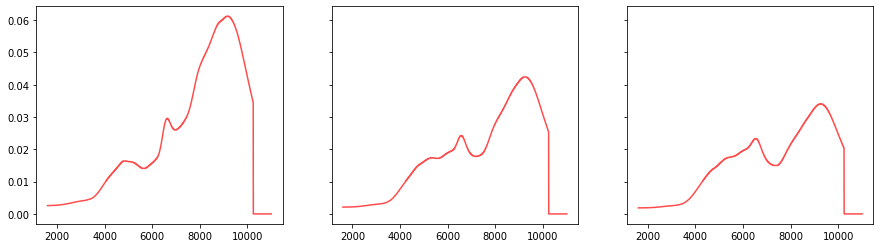

In [20]:
plotSed3Spec("pycoco_SN2020fqv.SED")

In [21]:
iptfx = iptf.iloc[:, 0].to_numpy().astype(np.float)
iptfy = iptf.iloc[:, 1].to_numpy().astype(np.float)
iptfz = iptf.iloc[:, 2].to_numpy().astype(np.float)

oix = oi.iloc[:, 0].to_numpy().astype(np.float)
oiy = oi.iloc[:, 1].to_numpy().astype(np.float)
oiz = oi.iloc[:, 2].to_numpy().astype(np.float)

oicx = oic.iloc[:, 0].to_numpy().astype(np.float)
oicy = oic.iloc[:, 1].to_numpy().astype(np.float)
oicz = oic.iloc[:, 2].to_numpy().astype(np.float)

yufx = yuf.iloc[:, 0].to_numpy().astype(np.float)
yufy = yuf.iloc[:, 1].to_numpy().astype(np.float)
yufz = yuf.iloc[:, 2].to_numpy().astype(np.float)

sgfx = sgf.iloc[:, 0].to_numpy().astype(np.float)
sgfy = sgf.iloc[:, 1].to_numpy().astype(np.float)
sgfz = sgf.iloc[:, 2].to_numpy().astype(np.float)

yvrx = yvr.iloc[:, 0].to_numpy().astype(np.float)
yvry = yvr.iloc[:, 1].to_numpy().astype(np.float)
yvrz = yvr.iloc[:, 2].to_numpy().astype(np.float)

fqvx = fqv.iloc[:, 0].to_numpy().astype(np.float)
fqvy = fqv.iloc[:, 1].to_numpy().astype(np.float)
fqvz = fqv.iloc[:, 2].to_numpy().astype(np.float)

In [22]:
mask = np.argwhere(~np.isnan(oiy))
oix = oix[mask]
oiy = oiy[mask]
oiz = oiz[mask]
oiz[np.isnan(oiz)] = 1.00E-9

mask = np.argwhere(~np.isnan(yufy))
yufx = yufx[mask]
yufy = yufy[mask]
yufz = yufz[mask]
yufz[np.isnan(yufz)] = 1.00E-9

mask = np.argwhere(~np.isnan(sgfy))
sgfx = sgfx[mask]
sgfy = sgfy[mask]
sgfz = sgfz[mask]
sgfz[np.isnan(sgfz)] = 1.00E-9

mask = np.argwhere(~np.isnan(oicy))
oicx = oicx[mask]
oicy = oicy[mask]
oicz = oicz[mask]
oicz[np.isnan(oicz)] = 1.00E-9

mask = np.argwhere(~np.isnan(yvry))
yvrx = yvrx[mask]
yvry = yvry[mask]
yvrz = yvrz[mask]
yvrz[np.isnan(yvrz)] = 1.00E-9

mask = np.argwhere(~np.isnan(fqvy))
fqvx = fqvx[mask]
fqvy = fqvy[mask]
fqvz = fqvz[mask]
fqvz[np.isnan(fqvz)] = 1.00E-9

In [23]:
len(oix)

152280

In [24]:
oix.reshape(-1)

array([-11.512, -11.512, -11.512, ..., 135.108, 135.108, 135.108])

In [25]:
len(oiy)

152280

In [26]:
len(oiz)

152280

In [27]:
print(len(np.unique(sgfx)))
print(len(np.unique(sgfy)))

106
1880


In [28]:
sgfzz = np.zeros((106,1880))

In [29]:
for i in range(len(sgfz)):
    sgfzz[int(i / 1880)][i % 1880] = sgfz[i]

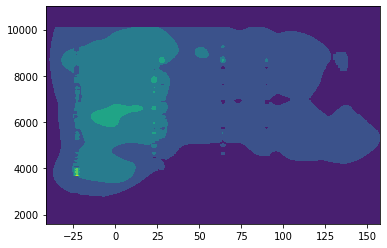

In [30]:
plt.contourf(np.unique(sgfx),np.unique(sgfy),sgfzz.T)

In [31]:
print(len(np.unique(fqvx)))
print(len(np.unique(fqvy)))

67
1880


In [32]:
fqvzz = np.zeros((67,1880))

In [33]:
for i in range(len(fqvz)):
    fqvzz[int(i / 1880)][i % 1880] = fqvz[i]

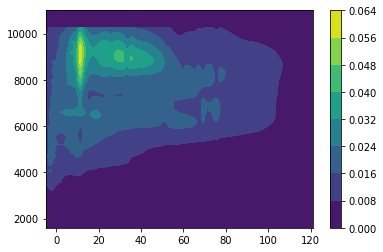

In [34]:
plt.contourf(np.unique(fqvx),np.unique(fqvy),fqvzz.T)
plt.colorbar()

In [35]:
print(len(np.unique(yvrx)))
print(len(np.unique(yvry)))

109
1880


In [36]:
yvrzz = np.zeros((109,1880))

In [37]:
for i in range(len(yvrz)):
    yvrzz[int(i / 1880)][i % 1880] = yvrz[i]

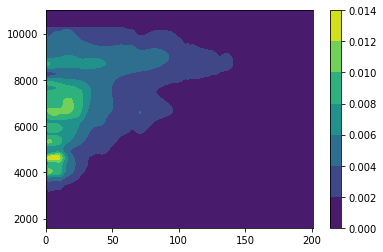

In [38]:
plt.contourf(np.unique(yvrx),np.unique(yvry),yvrzz.T)
plt.colorbar()

In [39]:
print(len(np.unique(yufx)))
print(len(np.unique(yufy)))

107
1880


In [40]:
yufzz = np.zeros((107,1880))

In [41]:
for i in range(len(yufz)):
    yufzz[int(i / 1880)][i % 1880] = yufz[i]

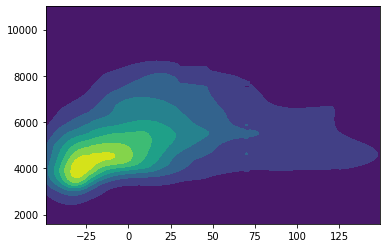

In [42]:
plt.contourf(np.unique(yufx),np.unique(yufy),yufzz.T)

In [43]:
print(len(np.unique(oix)))
print(len(np.unique(oiy)))

81
1880


In [44]:
oizz = np.zeros((81,1880))

In [45]:
for i in range(len(oiz)):
    oizz[int(i / 1880)][i % 1880] = oiz[i]

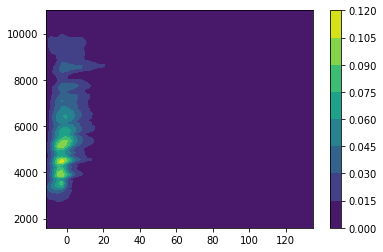

In [46]:
plt.contourf(np.unique(oix),np.unique(oiy),oizz.T)
plt.colorbar()

In [47]:
print(len(np.unique(iptfx)))
print(len(np.unique(iptfy)))
print(len(iptfz))
print(iptfz.reshape(len(np.unique(oiy)),-1).shape)

113
1880
212440
(1880, 113)


In [48]:
iptfzz = np.zeros((113,1880))

In [49]:
for i in range(len(iptfz)):
    iptfzz[int(i / 1880)][i % 1880] = iptfz[i]

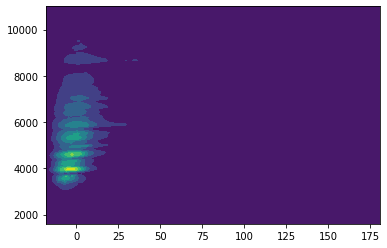

In [50]:
plt.contourf(np.unique(iptfx),np.unique(iptfy),iptfzz.T)

In [51]:
esm = pd.read_csv("pycoco_SN2020esm.SED",delimiter=' ',skiprows = 2)
esmx = esm.iloc[:, 0].to_numpy().astype(np.float)
esmy = esm.iloc[:, 1].to_numpy().astype(np.float)
esmz = esm.iloc[:, 2].to_numpy().astype(np.float)
    
mask = np.argwhere(~np.isnan(esmy))
esmx = esmx[mask]
esmy = esmy[mask]
esmz = esmz[mask]
esmz[np.isnan(esmz)] = 1.00E-9
    
esmzz = np.zeros((len(np.unique(esmx)),len(np.unique(esmy))))
for i in range(len(esmz)):
        esmzz[int(i / 1880)][i % 1880] = esmz[i]

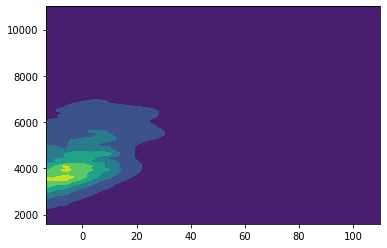

In [52]:
plt.contourf(np.unique(esmx),np.unique(esmy),esmzz.T)

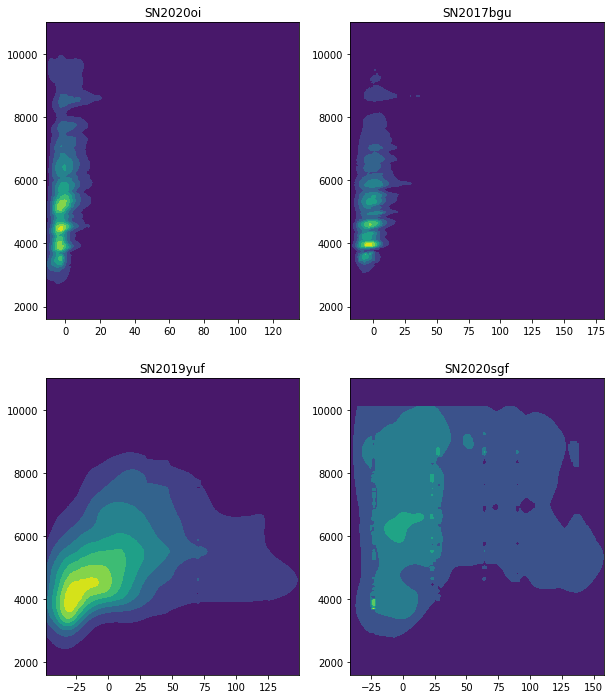

In [53]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,12))
ax1.contourf(np.unique(oix),np.unique(oiy),oizz.T)
ax1.title.set_text('SN2020oi')
ax2.contourf(np.unique(iptfx),np.unique(iptfy),iptfzz.T)
ax2.title.set_text('SN2017bgu')
ax3.contourf(np.unique(yufx),np.unique(yufy),yufzz.T)
ax3.title.set_text('SN2019yuf')
ax4.contourf(np.unique(sgfx),np.unique(sgfy),sgfzz.T)
ax4.title.set_text('SN2020sgf')

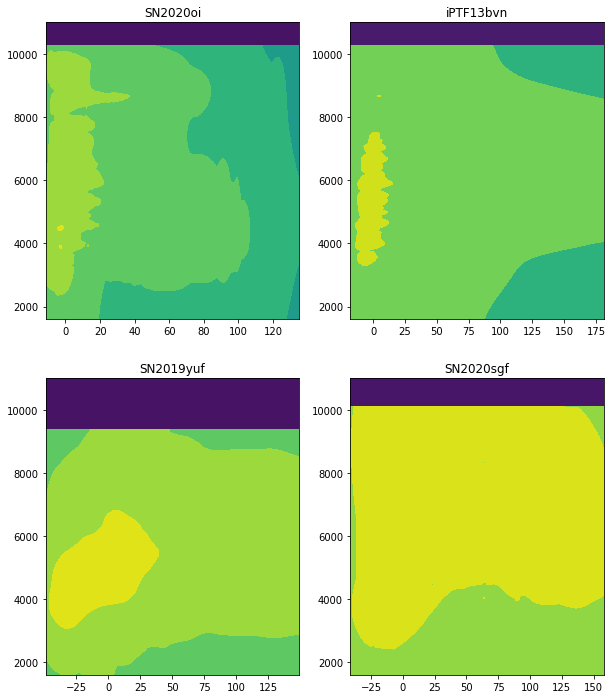

In [54]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,12))
ax1.contourf(np.unique(oix),np.unique(oiy),oizz.T, locator=ticker.LogLocator())
ax1.title.set_text('SN2020oi')
ax2.contourf(np.unique(iptfx),np.unique(iptfy),iptfzz.T, locator=ticker.LogLocator())
ax2.title.set_text('iPTF13bvn')
ax3.contourf(np.unique(yufx),np.unique(yufy),yufzz.T, locator=ticker.LogLocator())
ax3.title.set_text('SN2019yuf')
ax4.contourf(np.unique(sgfx),np.unique(sgfy),sgfzz.T, locator=ticker.LogLocator())
ax4.title.set_text('SN2020sgf')

In [55]:
print(len(np.unique(oicx)))
print(len(np.unique(oicy)))
print(len(oicz))

133
1880
250037


In [56]:
oiczz = np.zeros((133,1880))

In [57]:
for i in range(len(oicz)):
    oiczz[int(i / 1880)][i % 1880] = oicz[i]

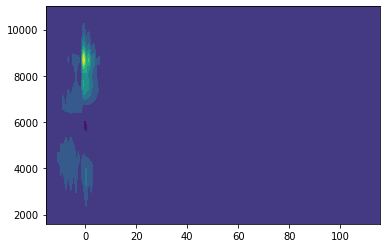

In [58]:
plt.contourf(np.unique(oicx  - 3.5),np.unique(oicy),oiczz.T)

In [59]:
datas = np.argwhere(np.unique(oix) == 1.478)

In [60]:
datas

array([[12]], dtype=int64)

In [61]:
len(oix[12])

1

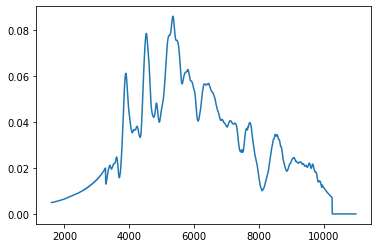

In [62]:
plt.plot(np.unique(oiy),oizz[12])

In [63]:
datas = np.argwhere(np.unique(iptfx) == 0)
datas

array([[21]], dtype=int64)

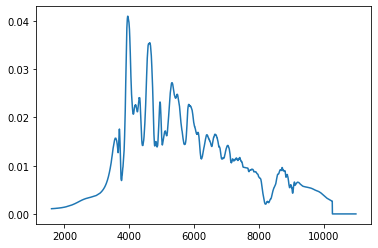

In [64]:
plt.plot(np.unique(iptfy),iptfzz[21])

In [65]:
oiy[700]

array([5105.])

In [66]:
esmy[580]

array([4505.])

In [67]:
fqvy[510]

array([4155.])

In [68]:
oiy[760]

array([5405.])

In [69]:
yvry[565]

array([4430.])

In [70]:
oizz[:,565]

array([0.00965 , 0.00965 , 0.0154  , 0.0219  , 0.0231  , 0.0313  ,
       0.0407  , 0.0413  , 0.0653  , 0.0968  , 0.11    , 0.0801  ,
       0.0549  , 0.0345  , 0.0231  , 0.0157  , 0.0127  , 0.00908 ,
       0.00947 , 0.00913 , 0.00812 , 0.00821 , 0.0074  , 0.00656 ,
       0.00628 , 0.00646 , 0.00546 , 0.00616 , 0.00595 , 0.00601 ,
       0.00597 , 0.00544 , 0.00607 , 0.00555 , 0.00543 , 0.00563 ,
       0.00537 , 0.00578 , 0.00552 , 0.00521 , 0.00497 , 0.00483 ,
       0.00472 , 0.00463 , 0.00452 , 0.00433 , 0.00401 , 0.00355 ,
       0.00305 , 0.00282 , 0.00274 , 0.00264 , 0.00252 , 0.00237 ,
       0.0022  , 0.00201 , 0.00178 , 0.00195 , 0.002   , 0.00176 ,
       0.00145 , 0.00137 , 0.00142 , 0.00116 , 0.00114 , 0.00109 ,
       0.000928, 0.00075 , 0.000659, 0.000615, 0.000532, 0.000488,
       0.000485, 0.0005  , 0.000517, 0.000476, 0.000402, 0.000285,
       0.000206, 0.000158, 0.000132])

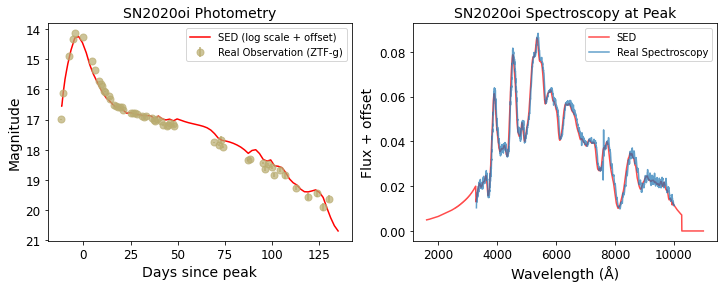

In [71]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(np.unique(oix),16.95 - np.log(np.sum(oizz[:,500:680], axis = 1)),label = "SED (log scale + offset)", color = "red")
plot_yse_ztf_file.get_grizXY_plot('./phot/2020oi',ax1,offset = 58867.162)
ax1.legend()

spec_curve = pd.read_csv("spec//2020oi//58868.638.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()
ax2.plot(np.unique(oiy),oizz[12],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen,fluxs*1e+13*0.75,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Days since peak",fontsize = 14)
ax1.set_ylabel("Magnitude",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2020oi Photometry",fontsize = 14)
ax2.set_title("SN2020oi Spectroscopy at Peak",fontsize = 14)

plt.savefig('SN2020oi.png', bbox_inches='tight')

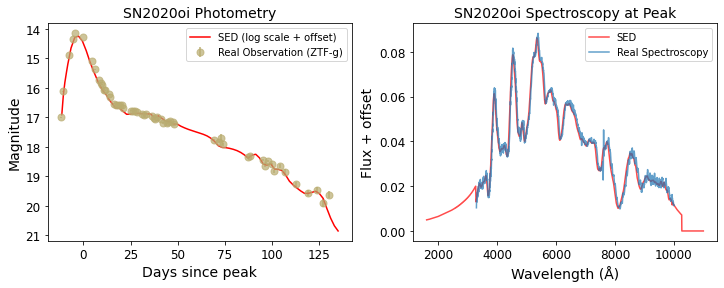

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(np.unique(oix),11.9 - np.log(oizz[:,700]),label = "SED (log scale + offset)", color = "red")
plot_yse_ztf_file.get_grizXY_plot('./phot/2020oi',ax1,offset = 58867.162)
ax1.legend()

spec_curve = pd.read_csv("spec//2020oi//58868.638.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()
ax2.plot(np.unique(oiy),oizz[12],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen,fluxs*1e+13*0.75,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Days since peak",fontsize = 14)
ax1.set_ylabel("Magnitude",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2020oi Photometry",fontsize = 14)
ax2.set_title("SN2020oi Spectroscopy at Peak",fontsize = 14)

plt.savefig('SN2020oi.png', bbox_inches='tight')

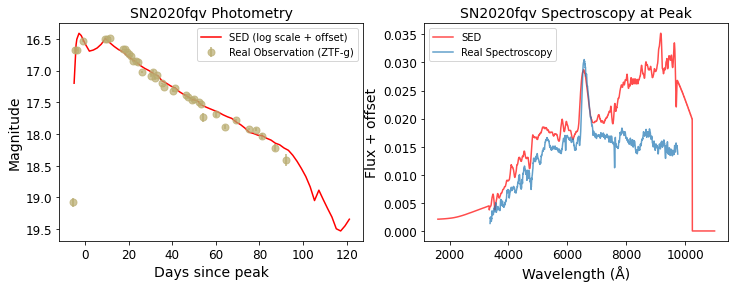

In [73]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(np.unique(fqvx),17.8 - np.log(np.sum(fqvzz[:,500:735], axis = 1)),label = "SED (log scale + offset)", color = "red")
plot_yse_ztf_file.get_grizXY_plot('./phot/2020fqv',ax1,offset = 58945)
ax1.legend()

spec_curve = pd.read_csv("spec//2020fqv//58957.3.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(np.unique(fqvy),fqvzz[9],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen,fluxs*1e+13*2,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Days since peak",fontsize = 14)
ax1.set_ylabel("Magnitude",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2020fqv Photometry",fontsize = 14)
ax2.set_title("SN2020fqv Spectroscopy at Peak",fontsize = 14)
plt.savefig('SN2020fqv.png', bbox_inches='tight')

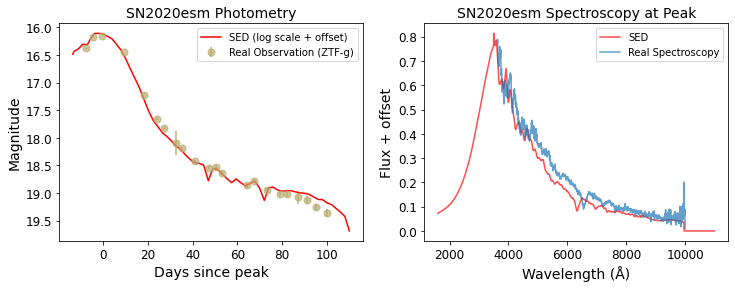

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(np.unique(esmx),15.5 - np.log(esmzz[:,580]),label = "SED (log scale + offset)", color = "red")
plot_yse_ztf_file.get_grizXY_plot('./phot/2020esm',ax1,offset = 58945)
ax1.legend()

spec_curve = pd.read_csv("spec//SN2020esm//58932.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(np.unique(esmy),esmzz[1],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen,fluxs*1e+14*5.4,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Days since peak",fontsize = 14)
ax1.set_ylabel("Magnitude",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2020esm Photometry",fontsize = 14)
ax2.set_title("SN2020esm Spectroscopy at Peak",fontsize = 14)
plt.savefig('SN2020esm.png', bbox_inches='tight')

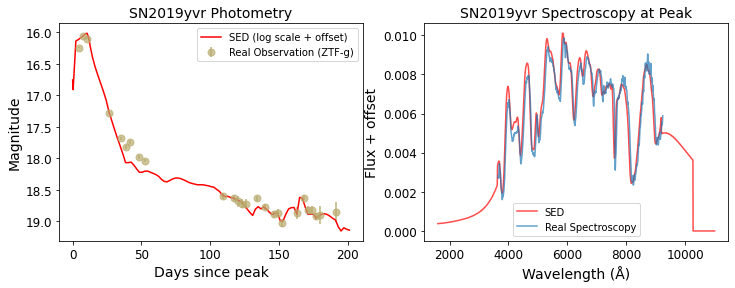

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(np.unique(yvrx),11.4 - np.log(yvrzz[:,565]),label = "SED (log scale + offset)", color = "red")
plot_yse_ztf_file.get_grizXY_plot('./phot/2019yvr',ax1,offset = 58846)
ax1.legend()

spec_curve = pd.read_csv("spec//SN2019yvr//58846.33.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()


ax2.plot(np.unique(yvry),yvrzz[1],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen*1,fluxs*1e+13*0.65,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Days since peak",fontsize = 14)
ax1.set_ylabel("Magnitude",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2019yvr Photometry",fontsize = 14)
ax2.set_title("SN2019yvr Spectroscopy at Peak",fontsize = 14)
plt.savefig('SN2019yvr.png', bbox_inches='tight')

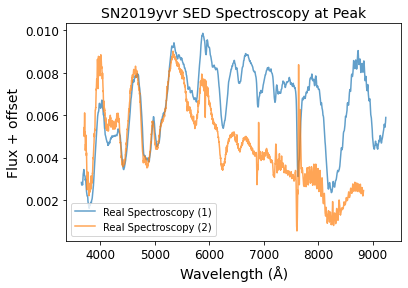

In [76]:
fig, ax2 = plt.subplots(1,1,figsize=(6,4))

spec_curve = pd.read_csv("spec//SN2019yvr//58846.33.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(wavelen*1,fluxs*1e+13*0.65,label = "Real Spectroscopy (1)",alpha = 0.7)

spec_curve = pd.read_csv("spec//SN2019yvr//58846.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(wavelen*1,fluxs*1e+13*1.2,label = "Real Spectroscopy (2)",alpha = 0.7)

ax2.legend()
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
#ax2.invert_yaxis()
ax2.tick_params("both",labelsize = 12)

ax2.set_title("SN2019yvr SED Spectroscopy at Peak",fontsize = 14)
plt.savefig('SN2019yvrSEDs.png', bbox_inches='tight')

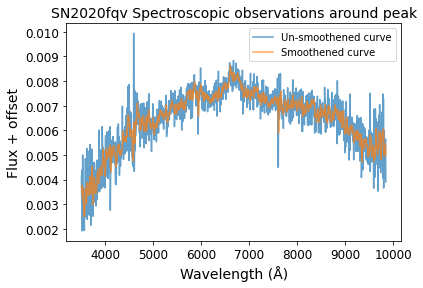

In [77]:
fig, ax2 = plt.subplots(1,1,figsize=(6,4))

spec_curve = pd.read_csv("spec//2020fqv//58941.25_rough.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(wavelen*1,fluxs*1e+13,label = "Un-smoothened curve",alpha = 0.7)

spec_curve = pd.read_csv("spec//2020fqv//58941.25.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(wavelen*1,fluxs*1e+13,label = "Smoothened curve",alpha = 0.7)

ax2.legend()
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
#ax2.invert_yaxis()
ax2.tick_params("both",labelsize = 12)

ax2.set_title("SN2020fqv Spectroscopic observations around peak",fontsize = 14)
plt.savefig('specsmmoth.png', bbox_inches='tight')

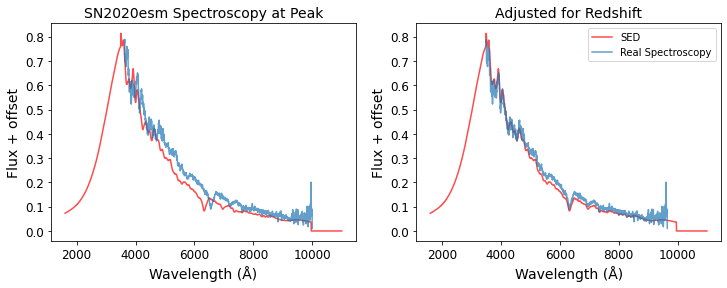

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

spec_curve = pd.read_csv("spec//SN2020esm//58932.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax2.plot(np.unique(esmy),esmzz[1],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen/(1+0.036),fluxs*1e+14*5.4,label = "Real Spectroscopy",alpha = 0.7)

spec_curve = pd.read_csv("spec//SN2020esm//58932.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

ax1.plot(np.unique(esmy),esmzz[1],label = "SED",color = "red",alpha = 0.7)
ax1.plot(wavelen,fluxs*1e+14*5.4,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Wavelength (Å)",fontsize = 14)
ax1.set_ylabel("Flux + offset",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux + offset",fontsize = 14)
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2020esm Spectroscopy at Peak",fontsize = 14)
ax2.set_title("Adjusted for Redshift",fontsize = 14)
plt.savefig('SN2020esmZ.png', bbox_inches='tight')

Text(0.5, 1.0, 'SN2019yvr')

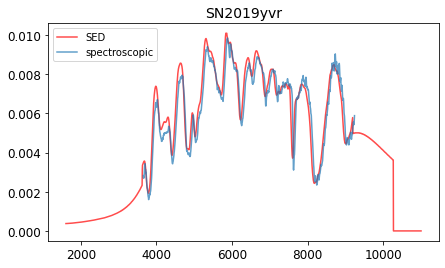

In [79]:
spec_curve = pd.read_csv("spec//SN2019yvr//58846.33.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

fig, ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(np.unique(yvry),yvrzz[1],label = "SED",color = "red",alpha = 0.7)
ax1.plot(wavelen*1,fluxs*1e+13*0.65,label = "spectroscopic",alpha = 0.7)
ax1.legend()
ax1.tick_params("both",labelsize = 12)
plt.title("SN2019yvr",fontsize = 14)

Text(0.5, 1.0, 'SN2020esm')

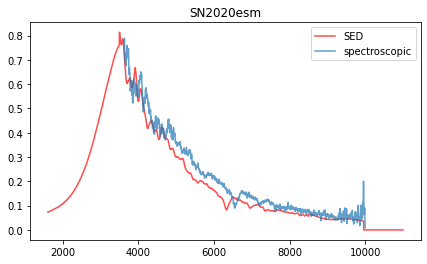

In [80]:
spec_curve = pd.read_csv("spec//SN2020esm//58932.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()

fig, ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(np.unique(esmy),esmzz[1],label = "SED",color = "red",alpha = 0.7)
ax1.plot(wavelen,fluxs*1e+14*5.4,label = "spectroscopic",alpha = 0.7)
ax1.legend()
plt.title("SN2020esm")

In [81]:
datas = np.argwhere(np.unique(oiy) == 5100)
datas

array([[699]], dtype=int64)

In [82]:
datas = np.argwhere(np.unique(fqvy) == 4100)
datas

array([[499]], dtype=int64)

In [83]:
datas = np.argwhere(np.unique(fqvy) == 4500)
datas

array([[579]], dtype=int64)

In [84]:
datas = np.argwhere(np.unique(yvry) == 4400)
datas

array([[559]], dtype=int64)

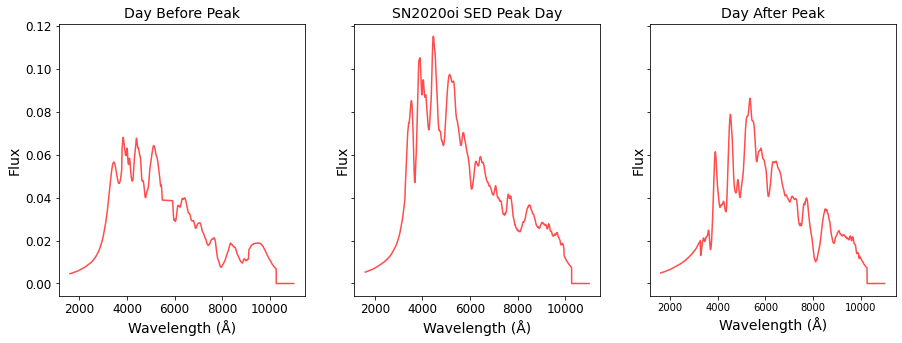

In [85]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
ax1.plot(np.unique(oiy),oizz[8],label = "SED",color = "red",alpha = 0.7)
ax2.plot(np.unique(oiy),oizz[10],label = "SED",color = "red",alpha = 0.7)
ax3.plot(np.unique(oiy),oizz[12],label = "SED",color = "red",alpha = 0.7)

ax1.set_xlabel("Wavelength (Å)",fontsize = 14)
ax1.set_ylabel("Flux",fontsize = 14)
ax1.set_title("Day Before Peak",fontsize = 14)
ax2.set_title("SN2020oi SED Peak Day",fontsize = 14)
ax3.set_title("Day After Peak",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux",fontsize = 14)
ax3.set_xlabel("Wavelength (Å)",fontsize = 14)
ax3.set_ylabel("Flux",fontsize = 14)
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)
plt.savefig('SN2020oiS.png', bbox_inches='tight')

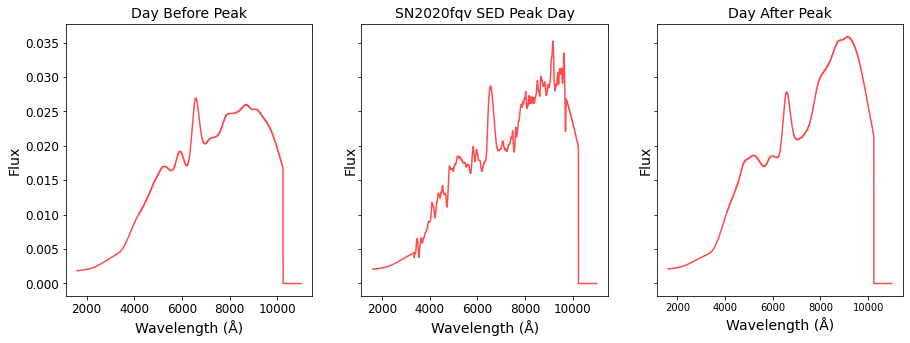

In [86]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
ax1.plot(np.unique(fqvy),fqvzz[8],label = "SED",color = "red",alpha = 0.7)
ax2.plot(np.unique(fqvy),fqvzz[9],label = "SED",color = "red",alpha = 0.7)
ax3.plot(np.unique(fqvy),fqvzz[10],label = "SED",color = "red",alpha = 0.7)

ax1.set_xlabel("Wavelength (Å)",fontsize = 14)
ax1.set_ylabel("Flux",fontsize = 14)
ax1.set_title("Day Before Peak",fontsize = 14)
ax2.set_title("SN2020fqv SED Peak Day",fontsize = 14)
ax3.set_title("Day After Peak",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux",fontsize = 14)
ax3.set_xlabel("Wavelength (Å)",fontsize = 14)
ax3.set_ylabel("Flux",fontsize = 14)
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)
plt.savefig('SN2020fqvS.png', bbox_inches='tight')

Text(0.5, 1.0, '2020esm')

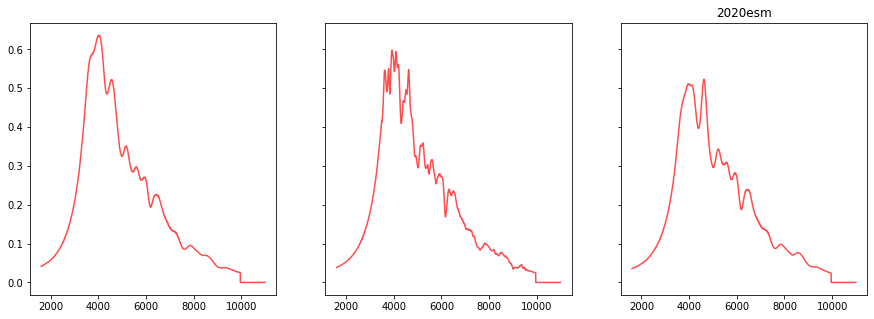

In [87]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
ax1.plot(np.unique(esmy),esmzz[9],label = "SED",color = "red",alpha = 0.7)
ax2.plot(np.unique(esmy),esmzz[10],label = "SED",color = "red",alpha = 0.7)
ax3.plot(np.unique(esmy),esmzz[11],label = "SED",color = "red",alpha = 0.7)
plt.title("2020esm")

In [88]:
def filterSEDfile(name,SNx,SNy,SNz):
    SNFiltered = pd.DataFrame()
    SNFiltered.insert(0,"mjd",SNx.reshape(-1))
    SNFiltered.insert(1,"wavelen",SNy.reshape(-1))
    SNFiltered.insert(2,"flux",SNz.reshape(-1))
    SNFiltered.to_csv("Finalsed_" + name + "_matasic.SED",sep=' ', index=None)

In [89]:
filterSEDfile("2020oi",oix,oiy,oiz)
filterSEDfile("2020esm",esmx,esmy,esmz)
filterSEDfile("2020fqv",fqvx,fqvy,fqvz)
filterSEDfile("2019yvr",yvrx,yvry,yvrz)

In [ ]:
[u"#4daf4a", u"#e41a1c", u"#832db6",u"#656364",u"#b9ac70",u"#bd1f01"]

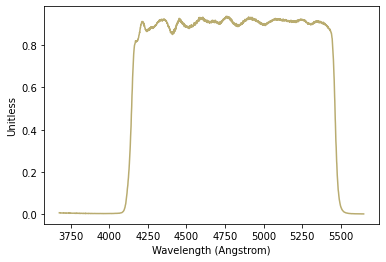

In [3]:
import os
from astropy.utils.data import get_pkg_data_filename
from synphot import SpectralElement #note: I've modified _do_plot() in Spectrum.py to add color input
bp = SpectralElement.from_file("ZTF_g.dat")
bp.plot(color = u"#b9ac70")

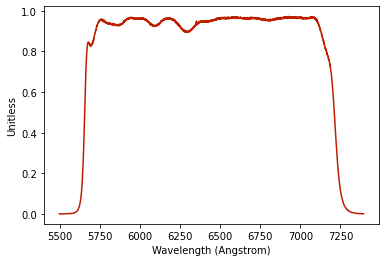

In [4]:
bp = SpectralElement.from_file("ZTF_r.dat")
bp.plot(color = u"#bd1f01")

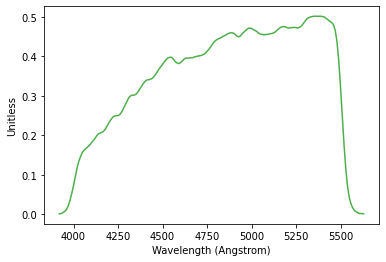

In [5]:
bp = SpectralElement.from_file("PAN-STARRS_PS1.g.dat")
bp.plot(color = u"#4daf4a")

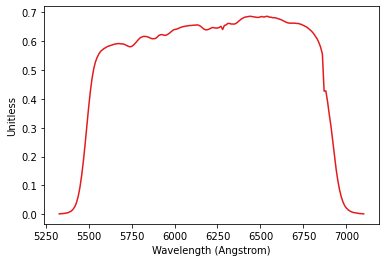

In [6]:
bp = SpectralElement.from_file("PAN-STARRS_PS1.r.dat")
bp.plot(color = u"#e41a1c")

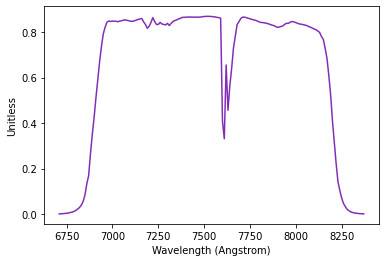

In [7]:
bp = SpectralElement.from_file("PAN-STARRS_PS1.i.dat")
bp.plot(color = u"#832db6")

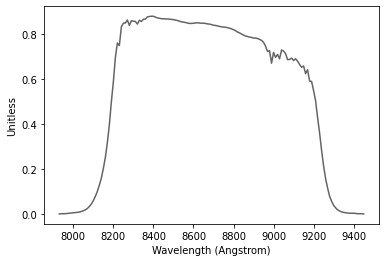

In [8]:
bp = SpectralElement.from_file("PAN-STARRS_PS1.z.dat")
bp.plot(color = u"#656364")

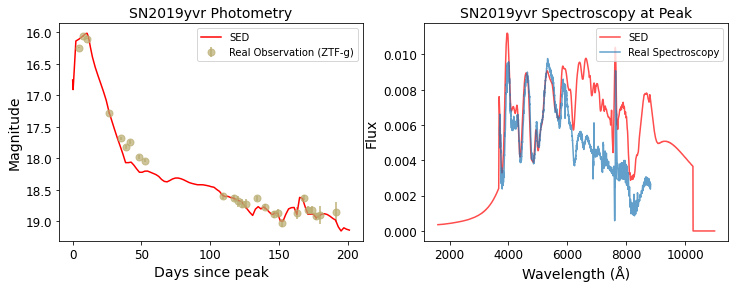

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(np.unique(yvrx),11.4 - np.log(yvrzz[:,565]),label = "SED", color = "red")
plot_yse_ztf_file.get_grizXY_plot('./phot/2019yvr',ax1,offset = 58846)
ax1.legend()

spec_curve = pd.read_csv("spec//SN2019yvr//58846.txt", delim_whitespace=True)
wavelen = spec_curve.iloc[:,0]
fluxs = spec_curve.iloc[:,1]
wavelen.to_numpy()
fluxs.to_numpy()


ax2.plot(np.unique(yvry),yvrzz[0],label = "SED",color = "red",alpha = 0.7)
ax2.plot(wavelen*1,fluxs*1e+13*1.3,label = "Real Spectroscopy",alpha = 0.7)

ax2.legend()
ax1.set_xlabel("Days since peak",fontsize = 14)
ax1.set_ylabel("Magnitude",fontsize = 14)
ax2.set_xlabel("Wavelength (Å)",fontsize = 14)
ax2.set_ylabel("Flux",fontsize = 14)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params("both",labelsize = 12)
ax2.tick_params("both",labelsize = 12)

ax1.set_title("SN2019yvr Photometry",fontsize = 14)
ax2.set_title("SN2019yvr Spectroscopy at Peak",fontsize = 14)
plt.savefig('SN2019yvr.png', bbox_inches='tight')